In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sn

In [2]:
df = pd.read_csv("../../Datasets/spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df["spam"] = df["Category"].apply(lambda x: 1 if x == "spam" else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [4]:
x = df["Message"]
y = df["spam"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [5]:
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 59347 stored elements and shape (4457, 7626)>

In [6]:
naive_bayes = MultinomialNB()

naive_bayes.fit(x_train_count, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [7]:
x_test_count = v.transform(x_test)
x_test_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13578 stored elements and shape (1115, 7626)>

In [8]:
y_predict = naive_bayes.predict(x_test_count)

Text(95.72222222222221, 0.5, 'Actual')

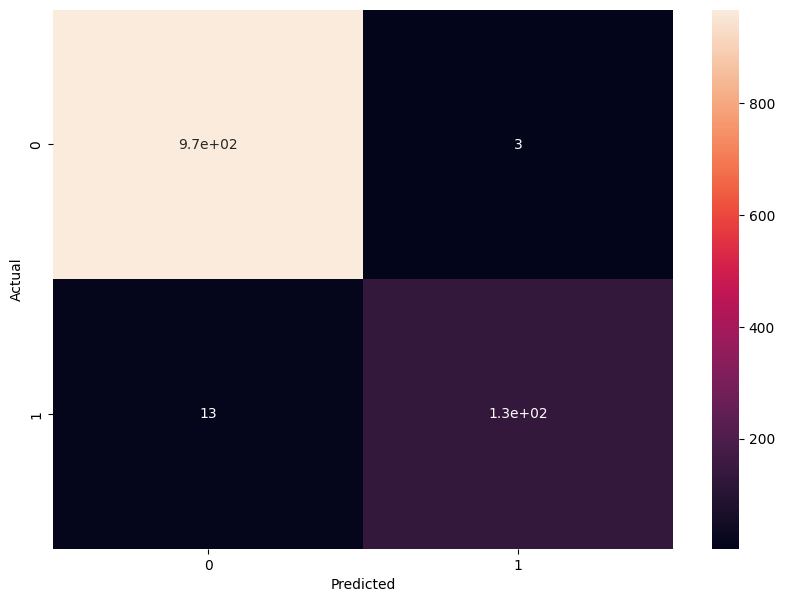

In [9]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [10]:
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.9856502242152466

In [11]:
precision = precision_score(y_test, y_predict)
precision

0.9777777777777777

In [12]:
recall = recall_score(y_test, y_predict)
recall

0.9103448275862069

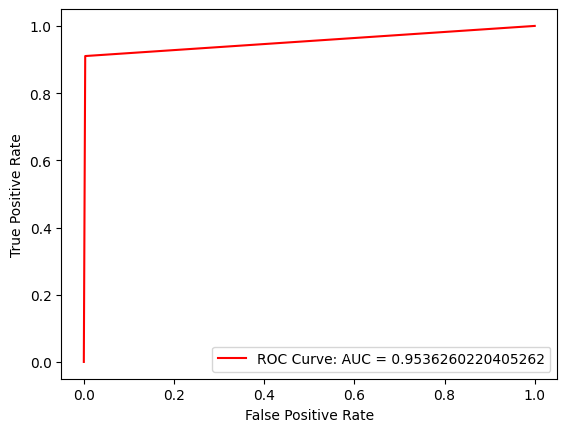

In [13]:
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = f"ROC Curve: AUC = {roc_auc}", color = "red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()